In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
cpsData = Path("CPSData.csv")
cpsDataDF = pd.read_csv(cpsData)

In [33]:
cpsDataDF.head()

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry
0,1,South,Alabama,26620.0,85,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Retired,NaN
1,3,South,Alabama,13820.0,21,Never Married,Male,High school,Black,0,57,"Citizen, Native",Unemployed,Professional and business services
2,3,South,Alabama,13820.0,37,Never Married,Female,High school,Black,0,57,"Citizen, Native",Disabled,NaN
3,3,South,Alabama,13820.0,18,Never Married,Male,No high school diploma,Black,0,57,"Citizen, Native",Not in Labor Force,NaN
4,3,South,Alabama,26620.0,52,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Employed,Professional and business services


In [34]:
# Focus columns
key_columns = ['EmploymentStatus', 'Sex', 'Age', 'Education', 'Married']
cps_cleaned = cpsDataDF[key_columns].dropna()

In [35]:
# Focus columns
key_columns = ['EmploymentStatus', 'Sex', 'Age', 'Education', 'Married']
cps_cleaned = cpsDataDF[key_columns].dropna()

In [36]:
# Create age bins
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
cps_cleaned['AgeGroup'] = pd.cut(cps_cleaned['Age'], bins=bins, labels=labels, right=False)

In [37]:
# Create age bins
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
cps_cleaned['AgeGroup'] = pd.cut(cps_cleaned['Age'], bins=bins, labels=labels, right=False)

In [38]:
# Group by demographics and employment status
grouped = cps_cleaned.groupby(['Sex', 'Education', 'Married', 'AgeGroup', 'EmploymentStatus']).size().unstack(fill_value=0)

# Calculate percentages within groups
group_percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100


In [39]:
# Calculate percentages within groups
group_percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

group_percentages.head()  # Preview the grouped data

EmploymentStatus                            Disabled   Employed  \
Sex    Education        Married  AgeGroup                         
Female Associate degree Divorced <18             NaN        NaN   
                                 18-30      0.000000  73.809524   
                                 31-45      4.054054  81.981982   
                                 46-60     10.112360  75.000000   
                                 60+        6.726457  46.188341   

EmploymentStatus                           Not in Labor Force    Retired  \
Sex    Education        Married  AgeGroup                                  
Female Associate degree Divorced <18                      NaN        NaN   
                                 18-30              16.666667   0.000000   
                                 31-45               8.108108   0.450450   
                                 46-60               6.179775   3.932584   
                                 60+                 3.587444  40.358744   

EmploymentStatus                           Unemployed  
Sex    Education        Married  AgeGroup              
Female Associate degree Divorced <18              NaN  
                                 18-30       9.523810  
                                 31-45       5.405405  
                                 46-60       4.775281  
                                 60+         3.139013

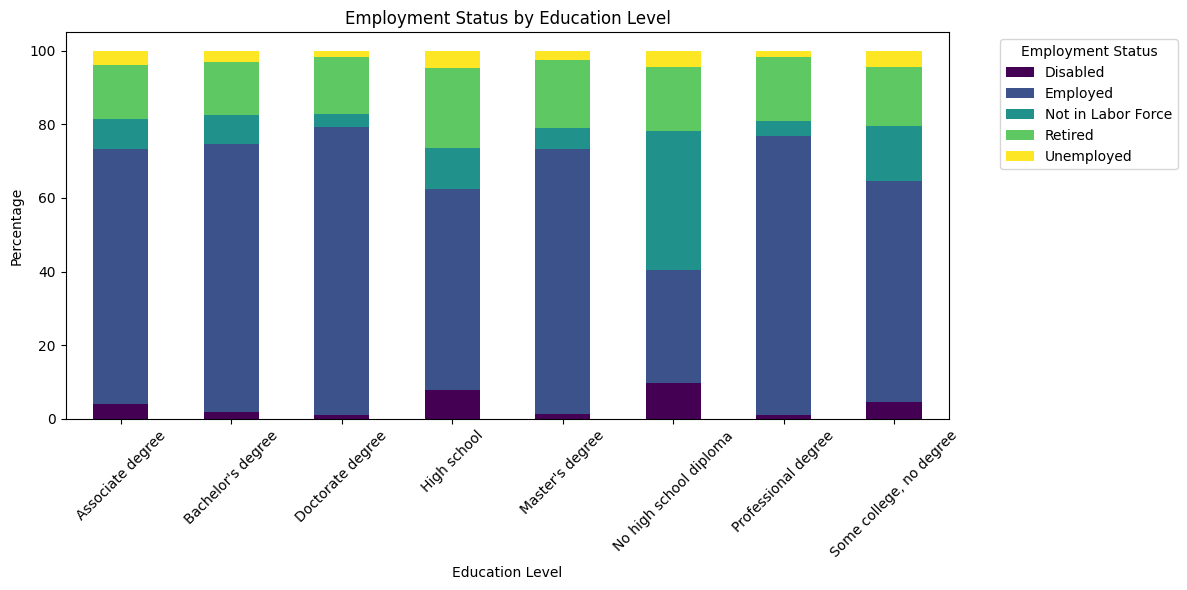

In [40]:
# Aggregate by education and employment status
grouped_by_education = cps_cleaned.groupby(['Education', 'EmploymentStatus']).size().unstack(fill_value=0)

# Calculate percentages
education_percentages = grouped_by_education.div(grouped_by_education.sum(axis=1), axis=0) * 100

# Visualize as a stacked bar chart
import matplotlib.pyplot as plt

education_percentages.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Employment Status by Education Level")
plt.ylabel("Percentage")
plt.xlabel("Education Level")
plt.legend(title="Employment Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
cps_cleaned.to_csv('cleaned_CPSData.csv', index=False)